In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
cowid = pd.read_csv('../../DataFile/raw_data.csv')

In [4]:
cowid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [5]:
# Remove unwanted column
cowid.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1,inplace=True)

In [6]:
cowid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.5+ MB


In [7]:
cowid.rename(columns={'iso_code':'ISO','location':'COUNTRY','total_cases':'TC','total_deaths':'TD','stringency_index':'STI',
                     'population':'Population','gdp_per_capita':'GDP','human_development_index':'HDI'},inplace=True)

In [8]:
median_death = cowid['TD'].median()
cowid.fillna({'TD':median_death}, inplace=True)


In [9]:
median_cases = cowid['TC'].median()
cowid.fillna({'TC':median_cases}, inplace=True)

In [10]:
median_gdp = cowid['GDP'].median()
cowid.fillna({'GDP':median_gdp}, inplace=True)

In [11]:
median_hdi = cowid['HDI'].median()
cowid.fillna({'HDI':median_hdi}, inplace=True)

In [12]:
print(cowid.isnull().sum())

ISO              0
COUNTRY          0
date             0
TC               0
TD               0
STI           7126
Population       0
GDP              0
HDI              0
dtype: int64


In [13]:
print(cowid.duplicated().sum())

0


In [14]:
cowid['date'] = pd.to_datetime(cowid['date'])

In [14]:
cowid.sample()

,ISO,COUNTRY,date,TC,TD,STI,Population,GDP,HDI
5895,BOL,Bolivia,2020-08-31,115968.0,4966.0,89.81,11673029,6885.829,0.693


In [20]:
cowid['month'] = cowid['date'].dt.month
monthly_cases = cowid.groupby('month')['TC'].sum().reset_index()

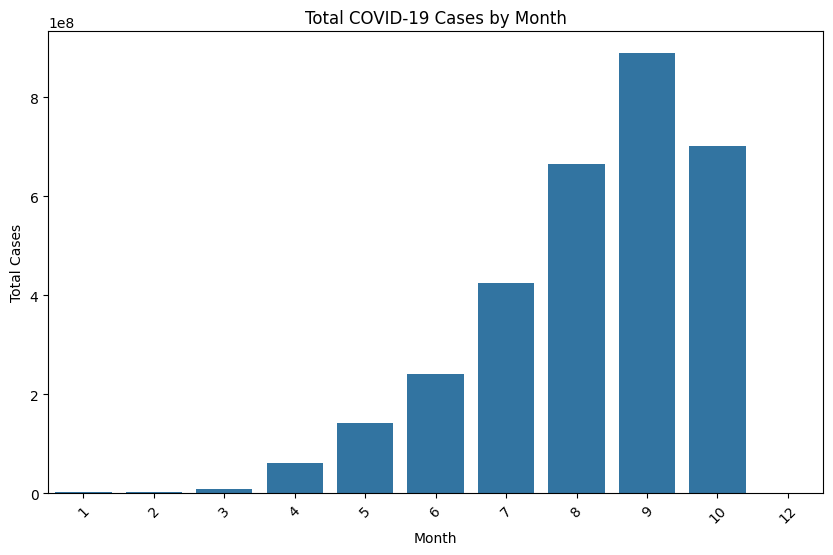

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='TC', data=monthly_cases)
plt.title('Total COVID-19 Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

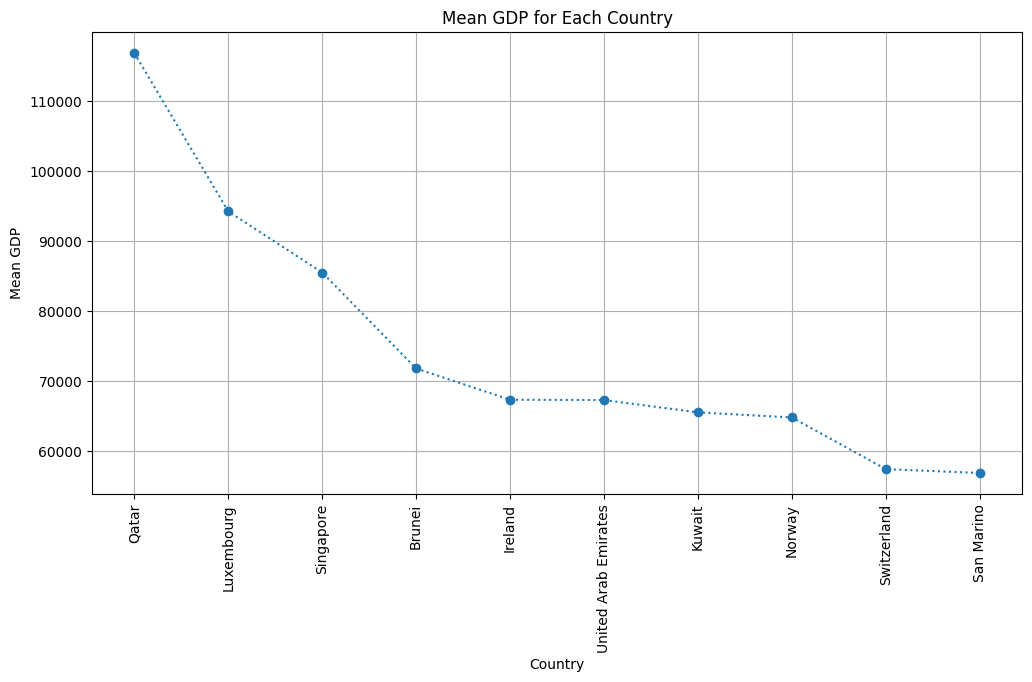

In [30]:
gr = cowid.groupby('COUNTRY')['GDP'].mean().reset_index()
gr_sorted = gr.sort_values(by='GDP',ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.plot(gr_sorted['COUNTRY'], gr_sorted['GDP'], marker='o', linestyle=':')
plt.title('Mean GDP for Each Country')
plt.xlabel('Country')
plt.ylabel('Mean GDP')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

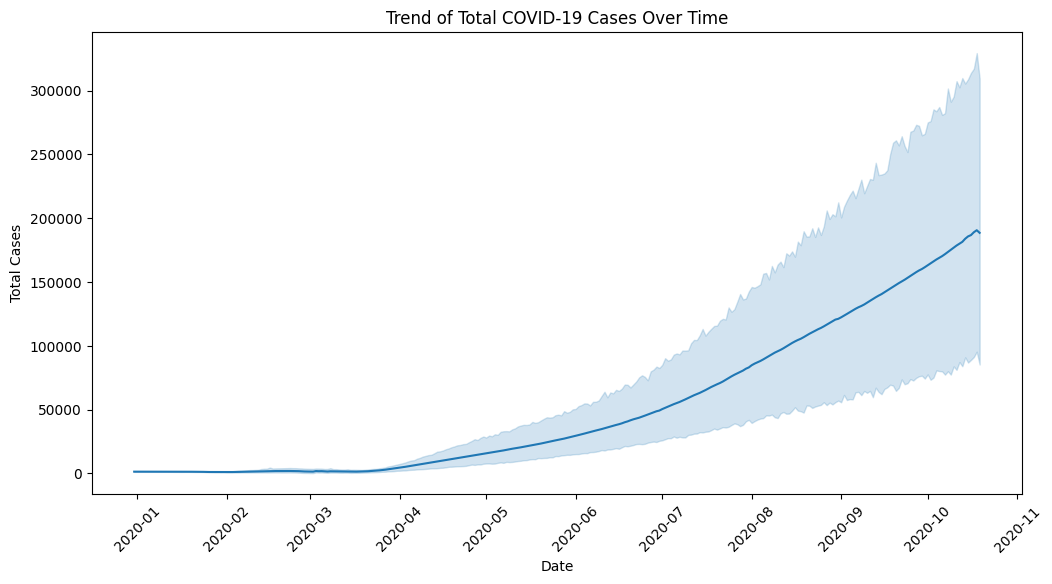

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='TC', data=cowid)
plt.title('Trend of Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

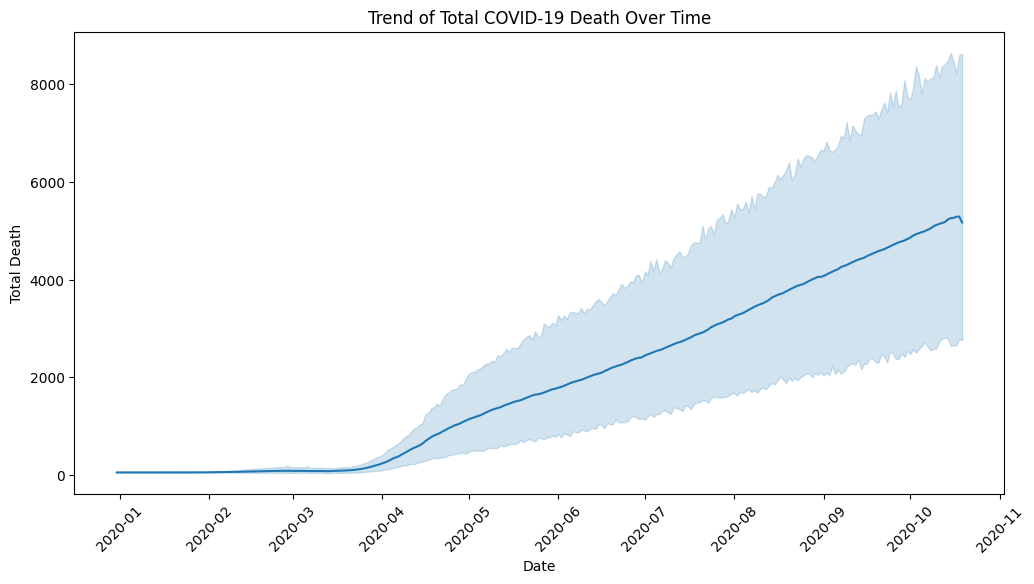

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='TD', data=cowid)
plt.title('Trend of Total COVID-19 Death Over Time')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.xticks(rotation=45)
plt.show()

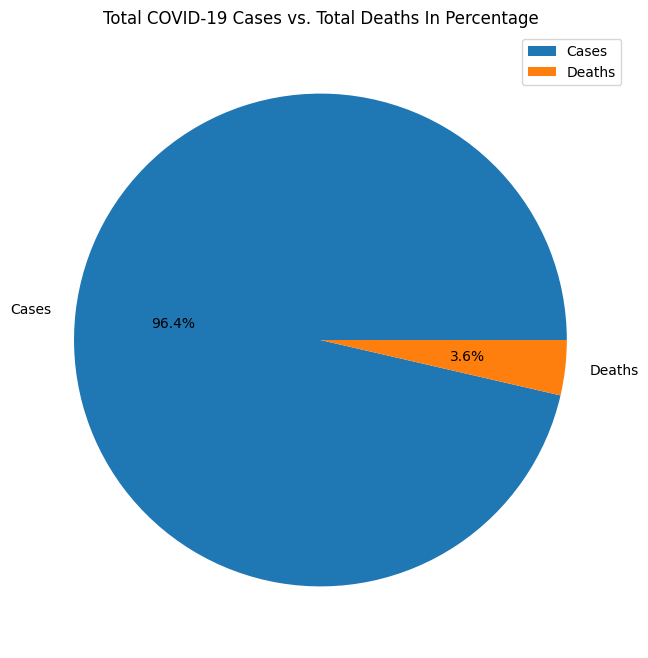

In [36]:
cases = cowid["TC"].sum() 
deaths = cowid["TD"].sum()
labels = ['Cases', 'Deaths']
values = [cases, deaths]

plt.figure(figsize=(12, 8))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Total COVID-19 Cases vs. Total Deaths In Percentage')
plt.legend()
plt.show()

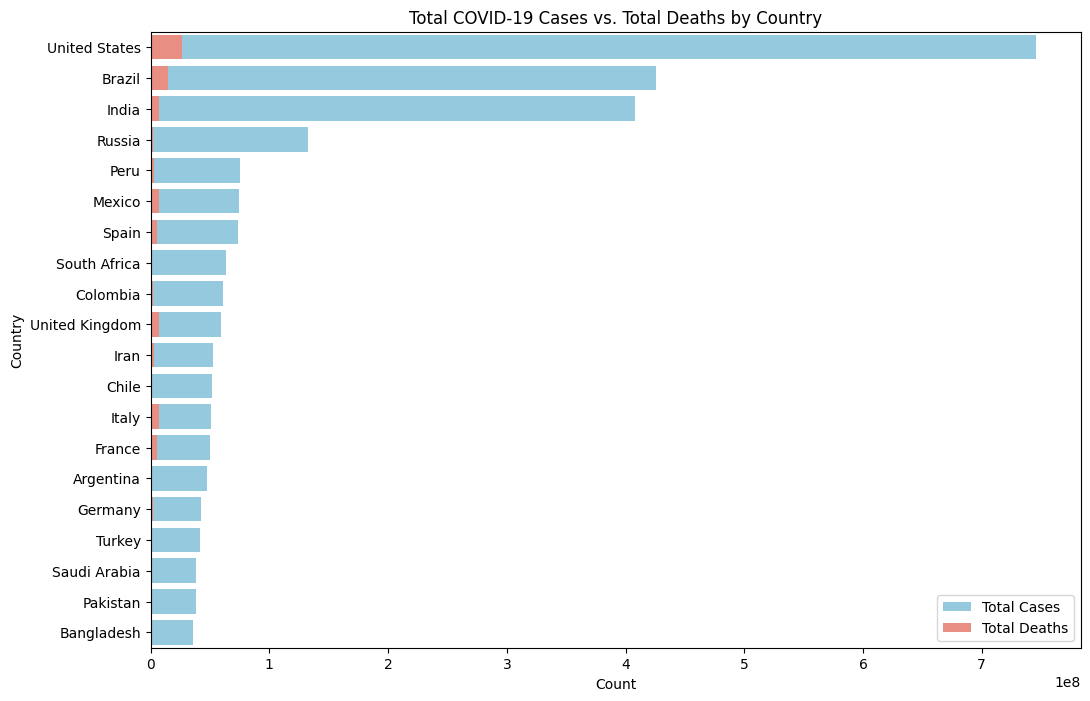

In [34]:
total_cases_deaths_by_country = cowid.groupby('COUNTRY')[['TC', 'TD']].sum().reset_index()
total_cases_deaths_by_country_sorted = total_cases_deaths_by_country.sort_values(by='TC', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='TC', y='COUNTRY', data=total_cases_deaths_by_country_sorted, color='skyblue', label='Total Cases')
sns.barplot(x='TD', y='COUNTRY', data=total_cases_deaths_by_country_sorted, color='salmon', label='Total Deaths')
plt.title('Total COVID-19 Cases vs. Total Deaths by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend()
plt.show()

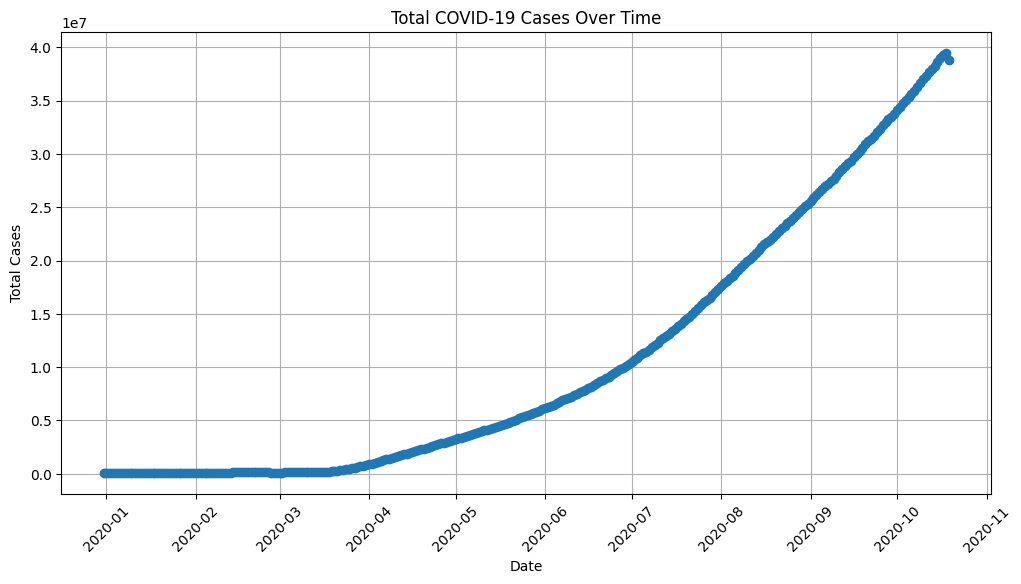

In [37]:
cowid['date'] = pd.to_datetime(cowid['date'])
total_cases_by_date = cowid.groupby('date')['TC'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(total_cases_by_date['date'], total_cases_by_date['TC'], marker='o', linestyle='-')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

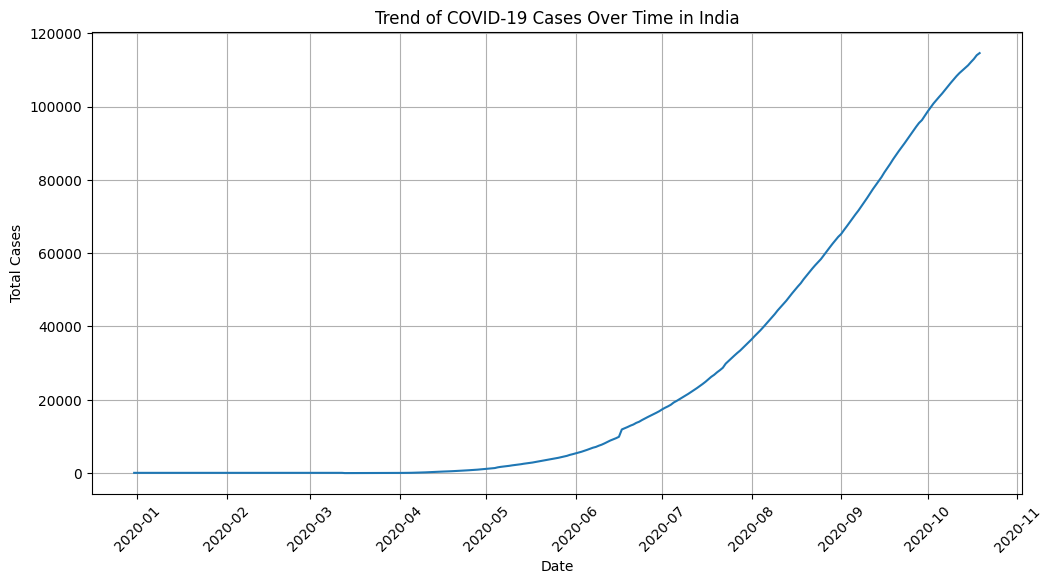

In [45]:
country_name = 'India'
country_data = cowid[cowid['COUNTRY'] == country_name]

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='TD', data=country_data)
plt.title(f'Trend of COVID-19 Cases Over Time in {country_name}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

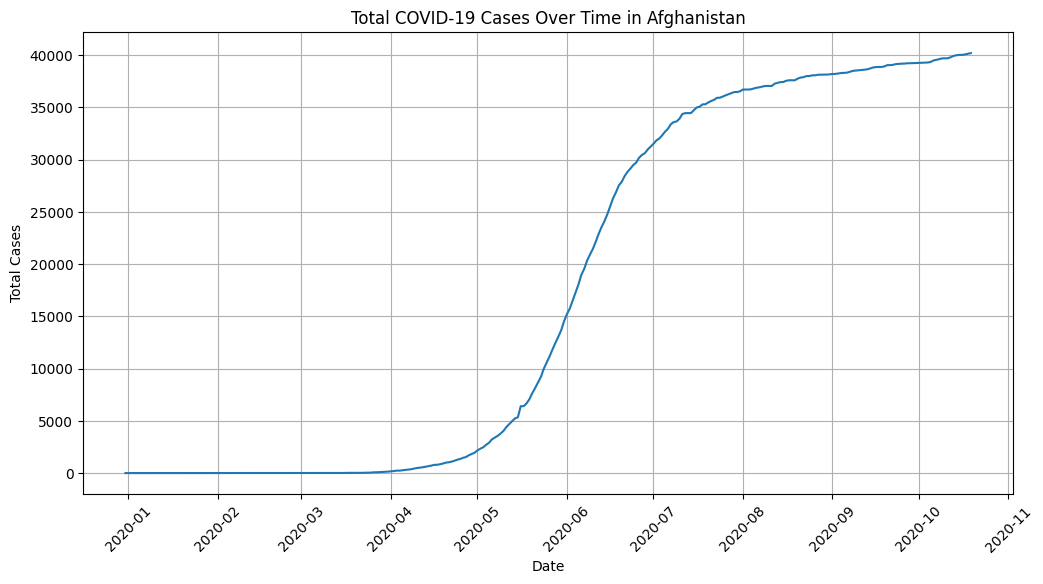

In [47]:
country_name = 'Afghanistan'
country_data = cowid[cowid['COUNTRY'] == country_name]

daily_cases = country_data.groupby('date')['TC'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='TC', data=daily_cases)
plt.title(f'Total COVID-19 Cases Over Time in {country_name}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()